In [12]:
import pandas as pd
import numpy as np
import re
import random

In [13]:
posGuideSeqDF = pd.read_csv(r"/Users/brendanwallace-nash/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Research Project-Brendan’s MacBook Pro/Guide Sequence/ModelPosGuides.csv")


In [14]:
#Emx1 genome 
EMX1_GENOME = r"/Users/brendanwallace-nash/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Research Project-Brendan’s MacBook Pro/Guide Sequence/EMX1.fna"

In [15]:
import random
from re import I
def getGuides(genome, guideDataFrame):
    # pre set varaibles that will be used thoughout the function
    GENEguides = {}
    seq = ""
    guideSeq = {}
    # open the genome file and preprocess in a line by line manner
    with open(genome, 'r') as fp:
        for line in fp:
            if not line[0] == ">":
                seq += line.rstrip()
            #set the regex pattern to find the guide, set to 23 and then can be reduced to 22, 21, 20
            guidePattern = r"(?=([ATCG]{22}[ATCG][ATCG]G[AG][AG][ATCG]))"
            #find all the guides in the line
            guides = re.findall(guidePattern, seq)
            #for each guide in the line create a dictionary contatining the guide and the reduced versions of the guide
            #the reduced verrsion are noted as we have limited data do not want to assume that the guide sequence of guide and guide+1 are different
            for guide in guides:
                guideSeq[guide[0:-6]] = [guide[:-6], guide[1:-6], guide[2:-6], guide[3:-6]]
            #append guides to GeneGuide list
            for value in guideSeq.values():
                for i in range(len(value)):
                    try:
                        GENEguides[value[i]] += 1
                    except KeyError:
                        GENEguides[value[i]] = 1
            #convert dictionary to a list
    GENEguides = list(GENEguides.keys())
    #shuffle list of guides to ensure a diverse selection of guides used in the getGuidesData function
    random.shuffle(GENEguides)
    GENEguides = getBadGuide(GENEguides, guideDataFrame)
    Badguides = getEqualDistributuion(GENEguides, guideDataFrame)
    return Badguides


def getBadGuide(guides, guideDataFrame):
    #varaible decleration
    badGuides = {}
    #while loop set conditioanly to 270 len of badGuides, as we want 250 guides and some will be removed later on we overestimate to account
    while len(badGuides) < 1000:
        #key error is used to ensure that the guide is not in the guideDataFrame or already in the badGuides dictionary
        try:
            badGuides[guides[len(badGuides)]] += 1
        except KeyError:
            badGuides[guides[len(badGuides)]] = 1
    #convert dictionary to a list
    badGuides = list(badGuides.keys())
    i = 0
    while i < len(badGuides):
        for index, row in posGuideSeqDF.iterrows():
            if badGuides[i] in row['Targets']:
                badGuides.pop(i)
                i -= 1
                break
        i += 1
    #this is done to ensure 255 guides are chosen
    #while len(badGuides) > 254:
        #badGuides.pop()
                
        
    #return the list of guides
    return badGuides
                
def getEqualDistributuion(guides, guideDataFrame):
    #this function is to set the guide distribution to be equal to that of the positive guides distribution
    nineteen = []
    twenty = []
    twentyone = []
    twentytwo = []
    #bad guides list
    Bnineteen = []
    Btwenty = []
    Btwentyone = []
    Btwentytwo = []
    for index, row in posGuideSeqDF.iterrows():
        if len(row['Targets']) == 19:
            nineteen.append(row['Targets'])
        elif len(row['Targets']) == 20:
            twenty.append(row['Targets'])
        elif len(row['Targets']) == 21:
            twentyone.append(row['Targets'])
        elif len(row['Targets']) == 22:
            twentytwo.append(row['Targets'])
        else:
            pass
    for badGuides in guides:
        if len(badGuides) == 19:
            Bnineteen.append(badGuides)
        elif len(badGuides) == 20:
            Btwenty.append(badGuides)
        elif len(badGuides) == 21:
            Btwentyone.append(badGuides)
        elif len(badGuides) == 22:
            Btwentytwo.append(badGuides)
        else:
            pass
    while len(nineteen) < len(Bnineteen):
        Bnineteen.pop()
    while len(twenty) < len(Btwenty):
        Btwenty.pop()
    while len(twentyone) < len(Btwentyone):
        Btwentyone.pop()
    while len(twentytwo) < len(Btwentytwo):
        Btwentytwo.pop()
    
    badGuides = Bnineteen + Btwenty + Btwentyone + Btwentytwo
    return badGuides


In [16]:
FinalBadGuides = getGuides(EMX1_GENOME, posGuideSeqDF)
len(FinalBadGuides)

309

In [17]:
finalGoodGuides = posGuideSeqDF['Targets'].tolist()

In [18]:
for badGuides in FinalBadGuides:
    for index, row in posGuideSeqDF.iterrows():
        if badGuides in row['Targets']:
            print(badGuides)
            print(len(badGuides))
            print(row['Targets'])
            print(len(row['Targets']))

In [19]:
nineteen = []
twenty = []
twentyone = []
twentytwo = []
for badGuides in FinalBadGuides:
    if len(badGuides) == 19:
        nineteen.append(badGuides)
    elif len(badGuides) == 20:
        twenty.append(badGuides)
    elif len(badGuides) == 21:
        twentyone.append(badGuides)
    elif len(badGuides) == 22:
        twentytwo.append(badGuides)
    else:
        pass
print("number of 19 guides: ", len(nineteen))
print("number of 20 guides: ", len(twenty))
print("number of 21 guides: ", len(twentyone))
print("number of 22 guides: ", len(twentytwo))

number of 19 guides:  65
number of 20 guides:  156
number of 21 guides:  74
number of 22 guides:  14


In [20]:
eighteen = []
nineteen = []
twenty = []
twentyone = []
twentytwo = []
twentythree = []
for index, row in posGuideSeqDF.iterrows():
    if len(row['Targets']) == 19:
        nineteen.append(row['Targets'])
    elif len(row['Targets']) == 18:
        eighteen.append(row['Targets'])
    elif len(row['Targets']) == 20:
        twenty.append(row['Targets'])
    elif len(row['Targets']) == 21:
        twentyone.append(row['Targets'])
    elif len(row['Targets']) == 22:
        twentytwo.append(row['Targets'])
    elif len(row['Targets']) == 23:
        twentythree.append(row['Targets'])
    else:
        pass   
print("number of 18 guides: ", len(eighteen))
print("number of 19 guides: ", len(nineteen))
print("number of 20 guides: ", len(twenty))
print("number of 21 guides: ", len(twentyone))
print("number of 22 guides: ", len(twentytwo))
print("number of 23 guides: ", len(twentythree))

number of 18 guides:  0
number of 19 guides:  65
number of 20 guides:  156
number of 21 guides:  74
number of 22 guides:  14
number of 23 guides:  0


In [21]:
def encoding(guide):
    #this function encodes the guide sequence into a 4x4 matrix
    #varaible decleration
    guideSeq = []
    #for loop to encode the guide sequence
    for i in range(len(guide)):
        if guide[i] == 'A':
            guideSeq.append(1)
        elif guide[i] == 'C':
            guideSeq.append(2)
        elif guide[i] == 'G':
            guideSeq.append(3)
        elif guide[i] == 'T':
            guideSeq.append(4)
        else:
            pass
    while len(guideSeq) < 22:
        guideSeq.append(0)
    #return the encoded guide sequence
    return guideSeq

In [22]:
def encodeGuides(guideList):
    #uses encoding function to encode all the guides in the list
    encodedGuides = []
    for guide in guideList:
        encodedGuides.append(encoding(guide))
    return encodedGuides

In [23]:
#Encode the ineffective guides
BadGuidesEncode = encodeGuides(FinalBadGuides)


In [24]:
#encodes the positive guides
goodguidesEncode = encodeGuides(posGuideSeqDF['Targets'])

In [25]:
import random
def XYGeneration(goodGuides, BadGuides):
    #this function generates the X and Y values for the model and shuffles them in a zip obfect to be used in the model
    X = []
    Y = []
    random.seed(42)
    for i in range(len(goodGuides)):
        X.append(goodGuides[i])
        Y.append(1)
    for i in range(len(BadGuides)):
        X.append(BadGuides[i])
        Y.append(0)
    c = list(zip(X, Y))
    random.shuffle(c)
    X, Y = zip(*c)
    return X, Y


In [26]:
X, Y = XYGeneration(goodguidesEncode, BadGuidesEncode)

In [27]:
from sklearn.model_selection import train_test_split
#Create the X and y test and training split to be used on the models
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)



In [28]:
"""import pickle
# the X and y test and training split are saved to pickles to be used on all models and testing
with open('X_train', 'wb') as f:
    pickle.dump(X_train, f)
with open('X_test', 'wb') as f:
    pickle.dump(X_test, f)
with open('y_train', 'wb') as f:
    pickle.dump(y_train, f)
with open('y_test', 'wb') as f:
    pickle.dump(y_test, f)"""

"import pickle\n# the X and y test and training split are saved to pickles to be used on all models and testing\nwith open('X_train', 'wb') as f:\n    pickle.dump(X_train, f)\nwith open('X_test', 'wb') as f:\n    pickle.dump(X_test, f)\nwith open('y_train', 'wb') as f:\n    pickle.dump(y_train, f)\nwith open('y_test', 'wb') as f:\n    pickle.dump(y_test, f)"

In [29]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)


NameError: name 'xgb' is not defined

In [ ]:
xg_reg.fit(X_train,y_train)

[23:44:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, ...)

In [ ]:
preds = xg_reg.predict(X_test)

In [ ]:
for i in range(len(preds)):
    if preds[i] > 0.5:
        preds[i] = 1
    else:
        preds[i] = 0

In [ ]:
preds

array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.], dtype=float32)

In [ ]:
correct = []
wrong = []
for i in range(len(preds)):
    if preds[i] == y_test[i]:
        correct.append(i)
    else:
        wrong.append(i)
print("number of correct predictions: ", len(correct))
print("number of wrong predictions: ", len(wrong))

number of correct predictions:  41
number of wrong predictions:  21


In [ ]:
def testResults(model, X_test, y_test):
    correctPred = []
    for i in range(len(X_test)):
        if model.predict([X_test[i]]) == y_test[i]:
            correctPred.append(1)
    print("Accuracy: ", len(correctPred)/len(X_test))


In [ ]:
testResults(xg_reg, X_test, y_test)

Accuracy:  0.0


In [ ]:
testResults(poly_kernel_svm_clf, X_test, y_test)

Accuracy:  0.6774193548387096


In [ ]:
from sklearn import naive_bayes
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train, y_train)

MultinomialNB()

In [ ]:
testResults(Naive, X_test, y_test)

Accuracy:  0.532258064516129


In [ ]:
from sklearn.svm import LinearSVC
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=2, loss="hinge")),
])
svm_clf.fit(X_train, y_train)

/Users/brendanwallace-nash/tensorflow-test/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=2, loss='hinge'))])

In [ ]:
testResults(svm_clf, X_test, y_test)

Accuracy:  0.5806451612903226


In [ ]:
rbf_kernerl_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
))
rbf_kernerl_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [ ]:
testResults(rbf_kernerl_svm_clf, X_test, y_test)

Accuracy:  0.4838709677419355


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline((
("scaler", StandardScaler()),
("sgd_clf", SGDClassifier(max_iter=1000, tol=1e-3, random_state=42))
))

sgd_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd_clf', SGDClassifier(random_state=42))])

In [ ]:
testResults(sgd_clf, X_test, y_test)

Accuracy:  0.46774193548387094


In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train, y_train)

LinearSVR(epsilon=1.5, random_state=42)

In [ ]:
testResults(svm_reg, X_test, y_test)

Accuracy:  0.5161290322580645


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
       
rfClass = RandomForestClassifier(n_estimators = 10)
rfClass.fit(X_train, y_train)

testResults(rfClass, X_test, y_test)

Accuracy:  0.7258064516129032


In [ ]:
import pickle

In [ ]:
# save the model to disk
#filename = 'finalized_RandomForrest.sav'
#pickle.dump(rfClass, open(filename, 'wb'))

In [ ]:
X_test[0]

[4, 3, 2, 4, 4, 1, 1, 4, 4, 1, 3, 3, 1, 3, 2, 2, 3, 3, 2, 0, 0, 0]

In [ ]:
def encodingReverse(guide):
    #this function encodes the guide sequence into a 4x4 matrix
    #varaible decleration
    guideSeq = []
    #for loop to encode the guide sequence
    for i in range(len(guide)):
        if guide[i] == 1:
            guideSeq.append('A')
        elif guide[i] == 2:
            guideSeq.append('C')
        elif guide[i] == 3:
            guideSeq.append('G')
        elif guide[i] == 4:
            guideSeq.append('T')
        else:
            pass
    #return the encoded guide sequence
    return guideSeq

In [ ]:
X_TestAlph = []
for gude in X_test:
    X_TestAlph.append(encodingReverse(gude))

In [ ]:
print(len(X_TestAlph))
print(len(y_test))

62
62


In [ ]:
resultList = []
for guide in X_TestAlph:
    if guide[0] == 'G':
        resultList.append(1)
    else:
        resultList.append(0)
match = 0
for i in range(len(resultList)):
    if resultList[i] == y_test[i]:
        match += 1
print("Accuracy: ", match/len(resultList))

Accuracy:  0.5645161290322581


In [ ]:
resultList = []
for guide in X_TestAlph:
    if len(guide) in [21, 22]:
        resultList.append(1)
    else:
        resultList.append(0)
match = 0
for i in range(len(resultList)):
    if resultList[i] == y_test[i]:
        match += 1
print("Accuracy: ", match/len(resultList))

Accuracy:  0.5967741935483871


In [ ]:
def consensusPipe(guideList):
    guideTest = []
    ConSenResult = []
    for guide in guideList:
        if guide[:1] == 'G':
            FirstCriteria = 1
        else:
            FirstCriteria = 0
        if len(guide) in [21, 22]:
            SecondCriteria = 1
        else:
            SecondCriteria = 0
        guideTest.append([FirstCriteria, SecondCriteria])
    for guide in guideTest:
        if sum(guide) >= 1:
            ConSenResult.append(1)
        else:
            ConSenResult.append(0)
    return ConSenResult

In [ ]:
num = 24
if num in [21, 22]:
    print("yes")
else:
    print("no")

no


In [ ]:
gudieSeq = "TTAGGCAGGAGGAGGAGGAG"
if gudieSeq[0] == 'G':
    print("yes")
else:
    print("no")

no


In [ ]:
resultsX_testAlph = consensusPipe(X_TestAlph)

In [ ]:
badResults = consensusPipe(FinalBadGuides)

In [ ]:
def testPipeTwo(guideTest):
    goodGuide = 0
    badGuide = 0
    for guideResult in guideTest:
        if sum(guideResult) >= 2:
            goodGuide += 1
        else:
            badGuide += 1
    print("number of good guides: ", goodGuide)
    print("number of bad guides: ", badGuide)

In [ ]:
def testPipeThree(guideTest):
    goodGuide = 0
    badGuide = 0
    for guideResult in guideTest:
        if sum(guideResult) == 3:
            goodGuide += 1
        else:
            badGuide += 1
    print("number of good guides: ", goodGuide)
    print("number of bad guides: ", badGuide)

In [ ]:
count = 0
for y in y_test:
    if y == 1:
        count += 1
print(count)

30


In [ ]:
def lenghtCriteria(guideList):
    for guide in guideList:
        guide = encodeGuides([guide])
    resultList = []
    for i in range(len(y_test)):
        if len(X_TestAlph[i]) in [21, 22]:
            if y_test[i] == 1:
                resultList.append(1)
            else:
                resultList.append(0)
    return resultList

In [ ]:
correctPos = 0
incorrectPos = 0
for i in range(len(y_test)):
    if X_TestAlph[i][0] == "G":
        if y_test[i] == 1:
            correctPos += 1
        else:
            incorrectPos += 1
print("from {} positive guides, {} were correctly identified as positive guides. From {} negative guide, only {} were identified as positive".format(sum(y_test), correctPos, len(y_test)-sum(y_test), incorrectPos))

from 30 positive guides, 16 were correctly identified as positive guides. From 32 negative guide, only 13 were identified as positive


In [ ]:
correctPos = 0
incorrectPos = 0
for i in range(len(y_test)):
    if X_TestAlph[i][0] == "G":
        if len(X_TestAlph[i]) in [21, 22]:
            if y_test[i] == 1:
                correctPos += 1
            else:
                incorrectPos += 1
print("from {} positive guides, {} were correctly identified as positive guides. From {} negative guide, only {} were identified as positive".format(sum(y_test), correctPos, len(y_test)-sum(y_test), incorrectPos))

from 30 positive guides, 10 were correctly identified as positive guides. From 32 negative guide, only 2 were identified as positive


In [ ]:
correctPos = 0
incorrectPos = 0
for i in range(len(y_test)):
    if sum(resultsX_testAlph[i]) == 2:
        if y_test[i] == 1:
            correctPos += 1
        else:
            incorrectPos += 1
print("from {} positive guides, {} were correctly identified as positive guides. From {} negative guide, only {} were identified as positive".format(sum(y_test), correctPos, len(y_test)-sum(y_test), incorrectPos))

from 30 positive guides, 12 were correctly identified as positive guides. From 32 negative guide, only 3 were identified as positive


In [ ]:
correctPos = 0
incorrectPos = 0
for i in range(len(y_test)):
    if X_TestAlph[i][0] == "G":
        if len(X_TestAlph[i]) in [21, 22]:
            if rfClass.predict([X_test[i]]) == 1:
                if y_test[i] == 1:
                    correctPos += 1
                else:
                    incorrectPos += 1
print("from {} positive guides, {} were correctly identified as positive guides. From {} negative guide, only {} were identified as positive".format(sum(y_test), correctPos, len(y_test)-sum(y_test), incorrectPos))

from 30 positive guides, 10 were correctly identified as positive guides. From 32 negative guide, only 1 were identified as positive


In [ ]:
correctPos = 0
incorrectPos = 0
for i in range(len(y_test)):
    if rfClass.predict([X_test[i]]) == 1:
        if y_test[i] == 1:
            correctPos += 1
        else:
            incorrectPos += 1
print("from {} positive guides, {} were correctly identified as positive guides. From {} negative guide, only {} were identified as positive".format(sum(y_test), correctPos, len(y_test)-sum(y_test), incorrectPos))

from 30 positive guides, 22 were correctly identified as positive guides. From 32 negative guide, only 9 were identified as positive


In [ ]:
testPipeTwo(resultsX_testAlph)

number of good guides:  15
number of bad guides:  47


In [ ]:
testPipeTwo(badResults)

number of good guides:  35
number of bad guides:  274


In [ ]:
testPipeThree(resultsX_testAlph)

number of good guides:  0
number of bad guides:  62


In [ ]:
testPipeThree(badResults)

number of good guides:  2
number of bad guides:  307


In [ ]:
from sklearn import metrics

In [ ]:
from ensurepip import bootstrap
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
       
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)


testResults(rf, X_test, y_test)

Accuracy:  0.6290322580645161


In [ ]:
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        correct.append(1)
        print(predictions[i])

0
1
0
0
0
1
0
0
0
0
0
0
1
0
1
1
1
1
1
1
0
0
1
0
0
0
1
0
1
1
0
1
1
0
0
1
0
0
1


In [ ]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,3,4,5],
    'criterion' :['absolute_error','squared_error'],
    'n_estimators': [5,10,20,30, 40,50,60,70,80,100,150,200]
}
# Create a base model
rfCV = RandomForestRegressor(random_state = 1099)

# Instantiate the grid search model
regCV = GridSearchCV(estimator = rfCV, cv=5,param_grid = param_grid, n_jobs = -1, verbose = 2, return_train_score=True)
# Fit the grid search to the data
regCV.fit(X_train, y_train)"""

"from sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n# Create the parameter grid based on the results of random search \nparam_grid = {\n    'max_depth': [2,3,4,5],\n    'criterion' :['absolute_error','squared_error'],\n    'n_estimators': [5,10,20,30, 40,50,60,70,80,100,150,200]\n}\n# Create a base model\nrfCV = RandomForestRegressor(random_state = 1099)\n\n# Instantiate the grid search model\nregCV = GridSearchCV(estimator = rfCV, cv=5,param_grid = param_grid, n_jobs = -1, verbose = 2, return_train_score=True)\n# Fit the grid search to the data\nregCV.fit(X_train, y_train)"

In [ ]:
correctPred = []
prediction =  regCV.predict(X_test)
for i in range(len(prediction)):
    if prediction[i] > 0.5:
        prediction[i] = 1
    else:
        prediction[i] = 0
for i in range(len(prediction)):
    if prediction[i] == y_test[i]:
        correctPred.append(1)
print("Accuracy: ", len(correctPred)/len(X_test))


NameError: name 'regCV' is not defined

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [ ]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
poly_svm_results = cross_validation(poly_kernel_svm_clf, X, Y)

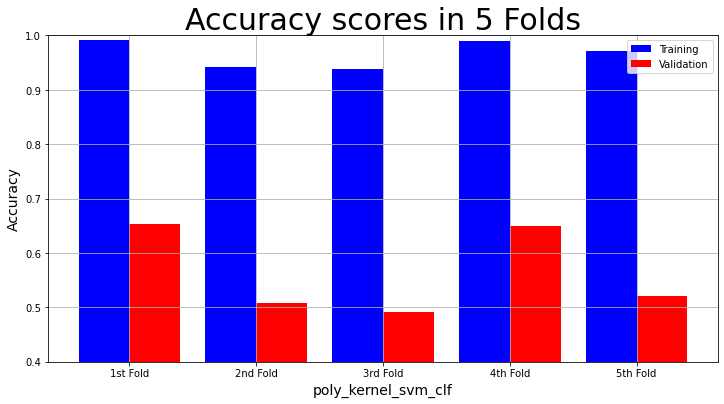

In [ ]:
model_name = "poly_kernel_svm_clf"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            poly_svm_results["Training Accuracy scores"],
            poly_svm_results["Validation Accuracy scores"])


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=254, metric='minkowski', p=2)
knn_clf.fit(X_train, y_train)
testResults(knn_clf, X_test, y_test)

Accuracy:  0.45161290322580644


In [ ]:
import pandas as pd
import nltk as nl
from nltk.stem.porter import *
from nltk.corpus import stopwords
import sklearn as sk
import numpy as np
import matplotlib as mp
import os
import string
import math


"""
The calc_df() function is passed the article dictionary with the key for the folder of articles that is being referenced.
an empty df_={} is declared and the keys of the dictionary position that is passed is looped thoughh. These keys are used as the
keys for then next loop of the artDIc to get its next keys which are the terms of the document. each term is used as the key for the the
df_ dictioanry to add 1 for each document it occurs in or to decalre 1 if its its first occurnance
"""
def calc_df(artdic):
    df_ = {}
    for id in artdic.keys():
        for key in artdic[id].keys():
            try:
                df_[key] += 1
            except KeyError:
                df_[key] = 1
    return df_

"""
getTFIDF() is a function to get a TFIDF score for the document of the dictionary collection that is passed (function is passed articleDic[folder][docID]).
tf is calculated by dividing the terms frequency by the total words in the documents, this value is then decalred to tdDict with the term as key and tf score as value.
idf is calculated by getting the natural log of the number of documents in the collection divdided by the terms document frequency.
tfidf is calculated by timesing the tf and idf of a term together. this returns a dictioanry of terms and their TFIDF scores for that documents.
"""
def getTFIDF(artDic, df):
    tfDict = {}
    docFreq = df
    docTotal = 0
    numDoc = len(artDic)

    for value in artDic.values():
        docTotal = docTotal+value
    for key, value in artDic.items():
        tfDict[key] = value/float(docTotal)

    idfDict = {}
    for word, val in docFreq.items():
        idfDict[word] = math.log10(numDoc / float(val))

    tfidfDic = {}
    for word, val in tfDict.items():
        tfidfDic[word] = val * idfDict[word]
    return tfidfDic

"""
this function uses the query terms and the the calculated tfidif of a documents terms the caclulate the tfidf of a document relevant to the query.
the tfidf of the documents term and the frequency of the query terms occurance are multiplied and appeded to a queryValue list, the sum of that list is decalred to a TFIDFScore dictionary with the DocID
as the key and the sum of query TDFID scores for that doc appended as the value.
"""
def getTFIDFScore(artDic, df, qDic):
    TFIDFScore = {}

    for doc in artDic.keys():
        exOutput = getTFIDF(artDic[doc], df)
        queryValue = []
        for key, value in qDic.items():
            try:
                queryValue.append(exOutput[key]*value)
            except KeyError:
                pass
        TFIDFScore[doc] = sum(queryValue)
    return TFIDFScore

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

ohe = OneHotEncoder()
transformed = ohe.fit_transform(posGuideSeqDF['Targets'].values.reshape(-1,1))
print(transformed.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:

import numpy as np
def onehote(sequence):
    mapping = {"A": 0, "C": 1, "G": 2, "T": 3}
    seq2 = [mapping[i] for i in sequence]
    return np.eye(4)[seq2]
onehotencode = onehote("ATCG")
print(onehotencode)
    

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [ ]:
from typing_extensions import Final


DNAmatrixList = []
for guide in FinalBadGuides:
    oneHotDNA = onehote(guide)
    DNAmatrixList.append(oneHotDNA)


In [ ]:
len(DNAmatrixList)
y = np.array(len(DNAmatrixList))

In [ ]:
DNAmatrixList = np.array(DNAmatrixList)
DNAmatrixList.tolist

/var/folders/m5/hh7l327s4v11y51pz3psw9f80000gn/T/ipykernel_99893/904121547.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  DNAmatrixList = np.array(DNAmatrixList)


<function ndarray.tolist>

In [ ]:
guideTest = []
for guide in posGuideSeqDF['Targets']:
    if guide[:1] == 'G':
        FirstCriteria = 1
    else:
        FirstCriteria = 0
    if len(guide) == 21 or 22:
        SecondCriteria = 1
    else:
        SecondCriteria = 0
    guide = encodeGuides(guide)
    if rfClass.predict(guide) > 0.5:
        ThirdCriteria = 1
    else:
        ThirdCriteria = 0
    guideTest.append([guide, FirstCriteria, SecondCriteria, ThirdCriteria])


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
for guide in posGuideSeqDF['Targets']:
    guide = encodeGuides(guide)
    result = rfClass.predict([guide].reshape(1, -1))
    print(result)

AttributeError: 'list' object has no attribute 'toarray'